In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
import pickle

Sampel Data:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6           

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Hasil Training Model:
Intercept (b0): 0.04
Koefisien (fitur):
age                         0.061067
anaemia                    -0.095332
creatinine_phosphokinase    0.000117
diabetes                    0.418770
ejection_fraction          -0.086130
high_blood_pressure        -0.092388
platelets                  -0.000002
serum_creatinine            0.742297
serum_sodium                0.003742
sex                        -0.479446
smoking                    -0.062394
time                       -0.022669
dtype: float64

Evaluasi Model:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



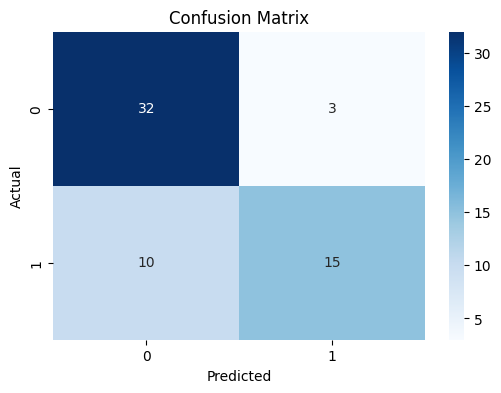

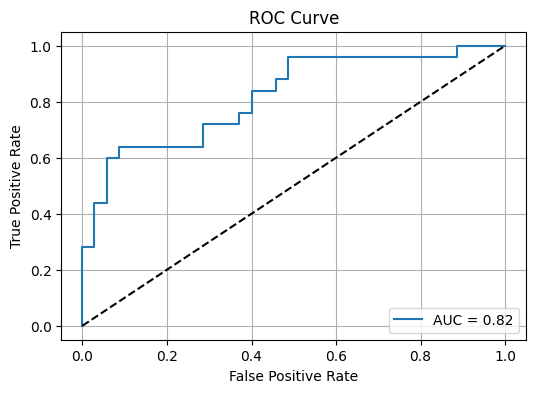

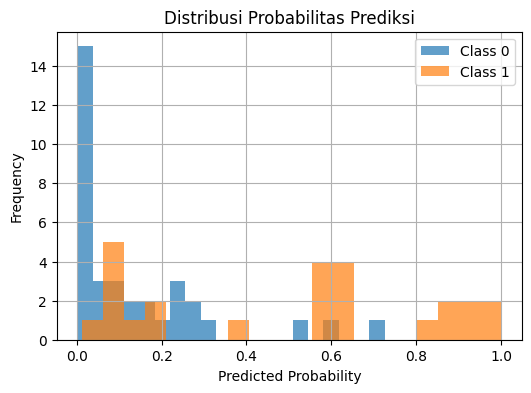

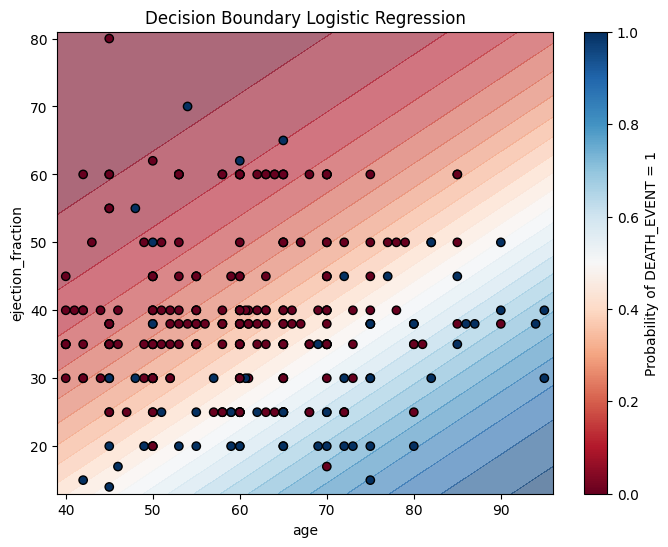


Mean Squared Error (MSE) antara probabilitas prediksi dan label aktual: 0.1767


In [ ]:
# 1. Load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.drop("DEATH_EVENT", axis=1)
Y = df["DEATH_EVENT"]

# Tampilkan 5 data teratas
print("Sampel Data:")
print(df.head())

# 2. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Buat dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# 4. Parameter model
print("\nHasil Training Model:")
print(f"Intercept (b0): {model.intercept_[0]:.2f}")
print(f"Koefisien (fitur):\n{pd.Series(model.coef_[0], index=X.columns)}")

# 5. Prediksi dan evaluasi
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]  # Dipindahkan ke sini agar bisa digunakan di bawah

accuracy = accuracy_score(Y_test, Y_pred)
print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(Y_test, Y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 8. Histogram Probabilitas
plt.figure(figsize=(6, 4))
plt.hist(Y_prob[Y_test == 0], bins=20, alpha=0.7, label="Class 0")
plt.hist(Y_prob[Y_test == 1], bins=20, alpha=0.7, label="Class 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribusi Probabilitas Prediksi")
plt.legend()
plt.grid(True)
plt.show()


# 9. Visualisasi Decision Boundary 2D
feature1 = 'age'
feature2 = 'ejection_fraction'
X_vis = df[[feature1, feature2]]
Y_vis = df["DEATH_EVENT"]

model_vis = LogisticRegression()
model_vis.fit(X_vis, Y_vis)

x_min, x_max = X_vis[feature1].min() - 1, X_vis[feature1].max() + 1
y_min, y_max = X_vis[feature2].min() - 1, X_vis[feature2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2])
probs = model_vis.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.6)
plt.scatter(X_vis[feature1], X_vis[feature2], c=Y_vis, cmap="RdBu", edgecolors="k")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundary Logistic Regression")
plt.colorbar(label="Probability of DEATH_EVENT = 1")
plt.show()

# 10. MSE
mse = mean_squared_error(Y_test, Y_prob)
print(f"\nMean Squared Error (MSE) antara probabilitas prediksi dan label aktual: {mse:.4f}")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
